In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/illustrations/lysozyme-in-water/"

In [3]:
from matplotlib import pyplot as plt

In [16]:
all_R1 = []
all_R2 = []
all_gij = []
all_name = []
for name in ["full_H2O",  "full_HEWL",  "FULL",  "inter_H2O_HEWL",  "inter_H2O",  "inter_HEWL_H2O",  "inter_HEWL",  "intra_H2O",  "intra_HEWL"]:
    data = "lysozyme-in-water/raw_data/"+name+".npy"
    dictionary = np.load(data, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C = np.real(dictionary.item()["C"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    N = np.real(dictionary.item()["N"])
    all_name.append(name)
    all_R1.append(R1)
    all_R2.append(R2)
    all_gij.append(C)
all_R1 = np.array(all_R1)
all_name = np.array(all_name)

/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",


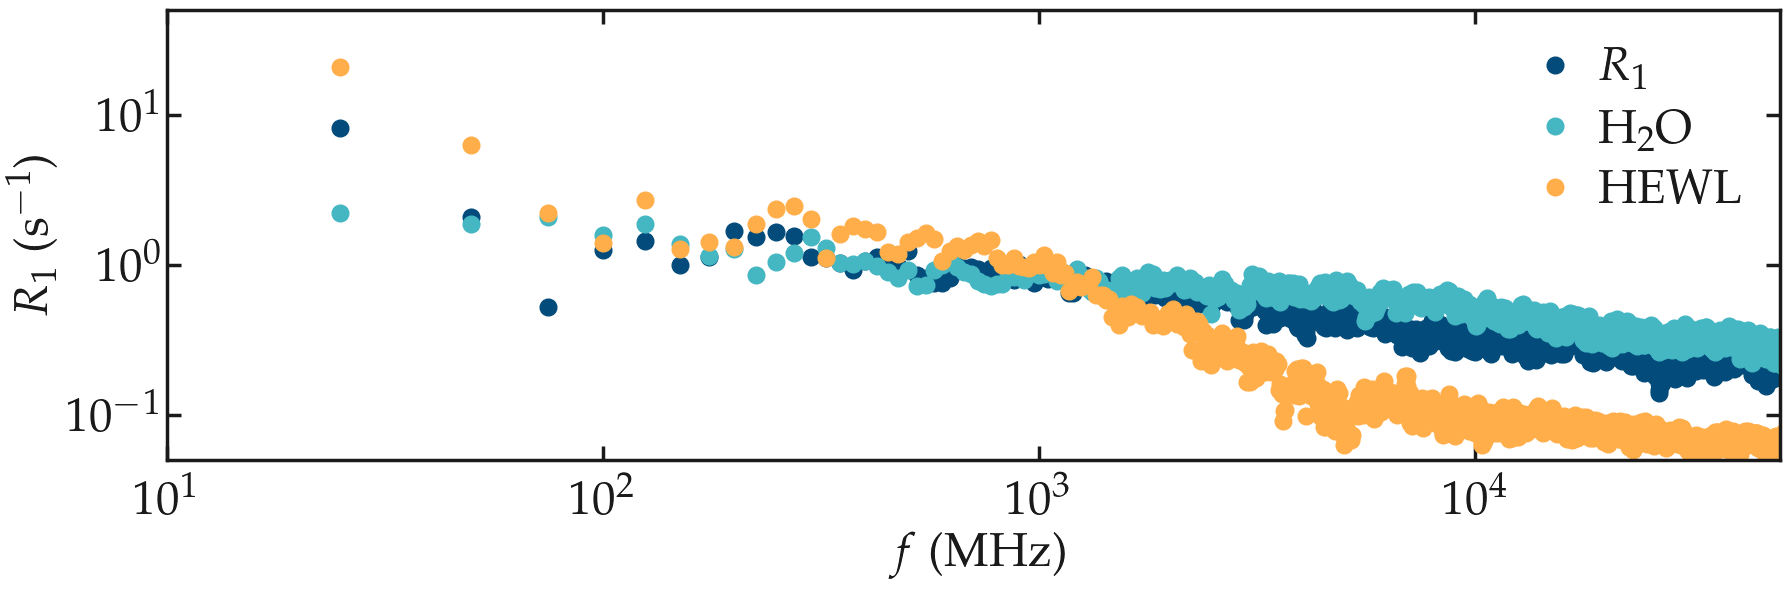

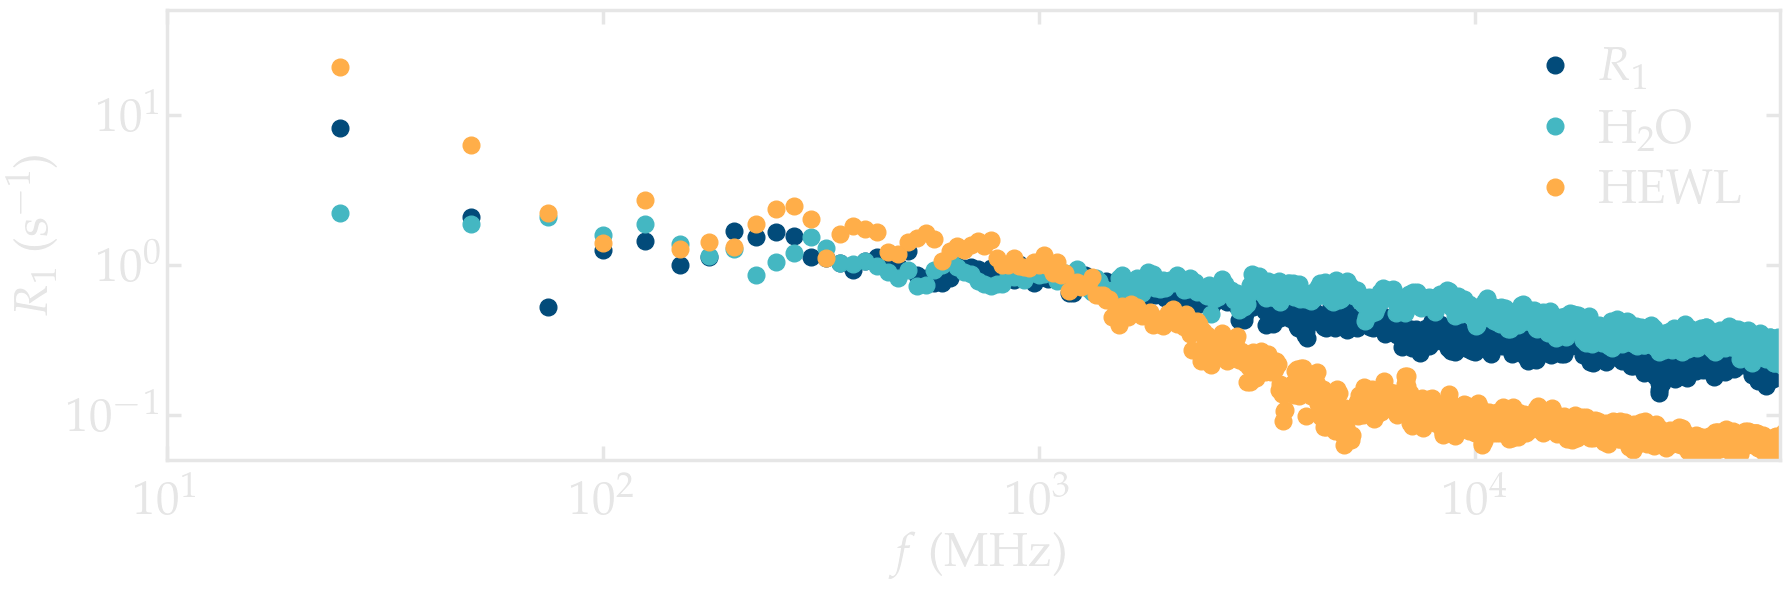

In [27]:
filename = "R1_spectra"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(f, all_R1[all_name == "FULL"][0], 'o', color=colors["mydarkblue"],
                 markersize = 12, linewidth=4, label=r'$R_1$')
    ax[-1].loglog(f, all_R1[all_name == "full_H2O"][0], 'o', color=colors["mycyan"],
                 markersize = 12, linewidth=4, label=r'H$_2$O')
    ax[-1].loglog(f, all_R1[all_name == "full_HEWL"][0], 'o', color=colors["myorange"],
                 markersize = 12, linewidth=4, label=r'HEWL')
    complete_panel(ax[-1], r'$f$ (MHz)', r'$R_1$ (s$^{-1}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(10, 5e4), y_boundaries=(5e-2, 50)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)